# 

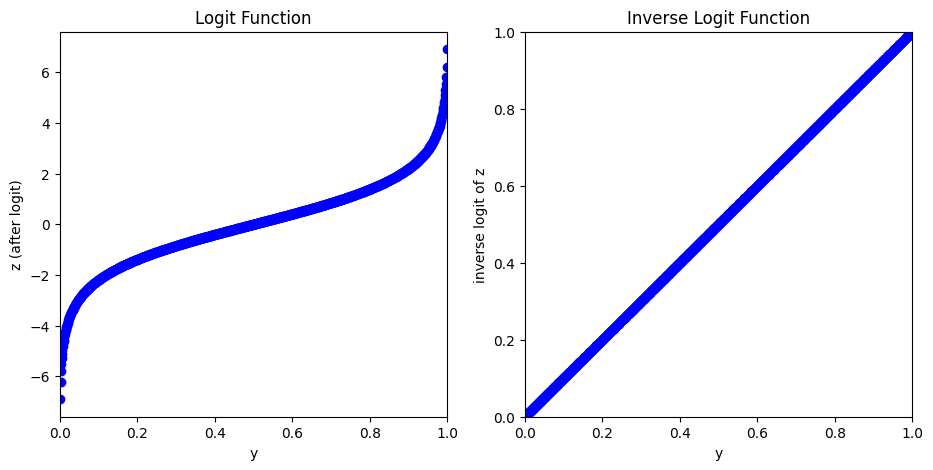

In [ ]:
# 03_03_logit

import matplotlib.pyplot as plt
import numpy as np

values = np.arange(0.001, 1, 0.001, dtype=float)
logit = np.log(values / (1 - values))
inverse_logit = np.exp(logit) / (1 + np.exp(logit))

fig, ax = plt.subplots(1, 2, squeeze=False, figsize=(11, 5))

fig1 = ax[0, 0]
fig1.scatter(values, logit, c="blue")
fig1.set_xlabel("y")
fig1.set_ylabel("z (after logit)")
fig1.set_xlim(0, 1)
fig1.set_title("Logit Function")

fig2 = ax[0, 1]
fig2.scatter(values, inverse_logit, c="blue")
fig2.set_xlabel("y")
fig2.set_ylabel("inverse logit of z")
fig2.set_xlim(0, 1)
fig2.set_ylim(0, 1)
fig2.set_title("Inverse Logit Function")
plt.show()


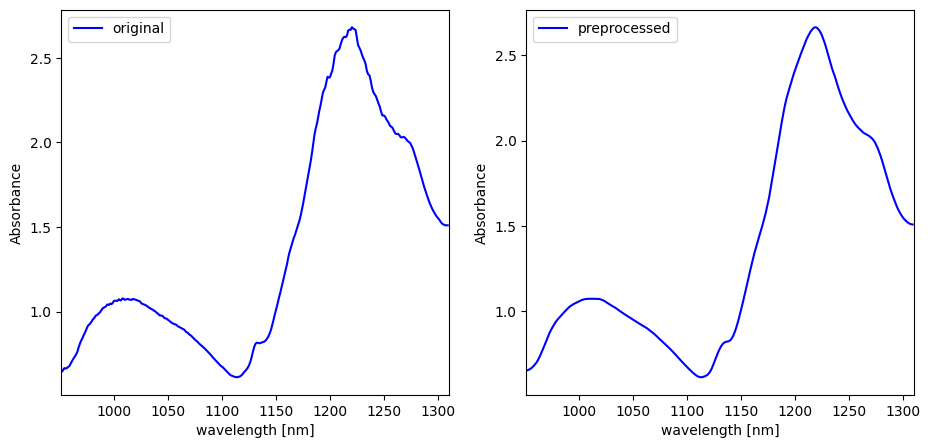

In [ ]:
# 03_04_sg

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
from scipy.signal import savgol_filter

# SG法の設定値
window_length = 21  # 窓枠の数
poly_order = 2  # 多項式の次数
deriv = 0  # 微分次数 (0 は微分なし)
plot_spectra_number = 12  # 表示するスペクトルのサンプル番号 (0, 1, ..., 227)

csv_path = Path("dataset/sample_spectra_dataset.csv")
preprocessed_csv_path = Path(
    f"dataset/preprocessed_sample_spectra_dataset_w{window_length}_p{poly_order}_d{deriv}.csv"
)

# データセットの読み込み
x = pl.read_csv(csv_path).drop("")
# SG 法
preprocessed_x = savgol_filter(
    x.to_numpy(), window_length=window_length, polyorder=poly_order, deriv=deriv
)
# pl.DataFrameに変換してcsvとして保存
preprocessed_x = pl.DataFrame(preprocessed_x, schema=x.schema)
preprocessed_x.with_row_index("").write_csv(preprocessed_csv_path)

# プロット
fig, ax = plt.subplots(1, 2, squeeze=False, figsize=(11, 5))
wave_lengths = np.array(x.columns, dtype="float64")
fig1 = ax[0, 0]
fig1.plot(wave_lengths, x.row(plot_spectra_number), "b-", label="original")
fig1.set_xlabel("wavelength [nm]")
fig1.set_ylabel("Absorbance")
fig1.set_xlim(wave_lengths[0] - 1, wave_lengths[-1] + 1)
fig1.legend()

fig2 = ax[0, 1]
fig2.plot(
    wave_lengths,
    preprocessed_x.row(plot_spectra_number),
    "b-",
    label="preprocessed",
)
fig2.set_xlabel("wavelength [nm]")
fig2.set_ylabel("Absorbance")
fig2.set_xlim(wave_lengths[0] - 1, wave_lengths[-1] + 1)
fig2.legend()
plt.show()
